In [109]:
# Solving the Iris dataset classification using SVM model and check its accuracy as well.
# the sepecies are differntiated based on their petal and sepal length and widths so it is our criteria as well.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm  # SVM: SUPPORT VECTOR MACHINES
from sklearn.datasets import load_iris
iris=load_iris()


In [110]:
type(iris)

sklearn.utils.Bunch

In [111]:
dir(iris) # contents of iris directory

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [112]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [113]:
iris.data  # dataset which will be used as dataframe

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [114]:
iris.target_names #the different species of iris floweres.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
#The dataframe construction of dataframces
df=pd.DataFrame(iris.data,columns =iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [116]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [117]:
# adding new columns astarget and target names to data frame
df["target"]= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [118]:
#df["flower_type"]=iris.target_names # this will not work as we have only  3 values for it. so we have to fix it to each type in dataframe.

In [119]:
df["flower_type"]=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_type
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [120]:
#lets divide the data based on different flowers species
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

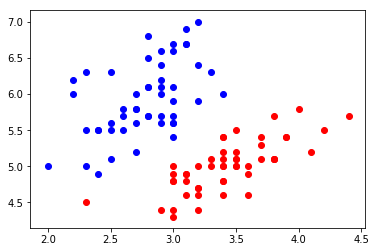

In [121]:
# Lets plot it to see the model we can use for it. # model selection criteria
plt.scatter(df0["sepal width (cm)"],df0[ "sepal length (cm)"],color="r")
plt.scatter(df1["sepal width (cm)"],df1[ "sepal length (cm)"],color="b")
#plt.scatter(df2["sepal width (cm)"],df2[ "sepal length (cm)"],color="g")

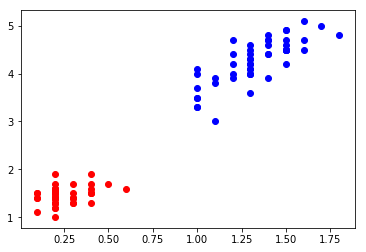

In [122]:
plt.scatter(df0["petal width (cm)"],df0[ "petal length (cm)"],color="r")
plt.scatter(df1["petal width (cm)"],df1[ "petal length (cm)"],color="b")


In [123]:
#As the plot shows ,we can draw a line to classify the different varieties
#lelts drop the columns flowers_type and target for an unbiased dataset and train our original iris_data datset.
X=df.drop(["target","flower_type"],axis="columns")


In [124]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [125]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [141]:
#lets train our dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [127]:
len(X_train)

120

In [128]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
47,4.6,3.2,1.4,0.2
125,7.2,3.2,6.0,1.8
70,5.9,3.2,4.8,1.8
21,5.1,3.7,1.5,0.4
92,5.8,2.6,4.0,1.2
68,6.2,2.2,4.5,1.5
14,5.8,4.0,1.2,0.2
111,6.4,2.7,5.3,1.9
41,4.5,2.3,1.3,0.3


In [129]:
len(y_train)

30

In [142]:
y_train

128    2
143    2
123    2
6      0
26     0
109    2
106    2
22     0
20     0
74     1
140    2
90     1
88     1
97     1
105    2
118    2
71     1
63     1
3      0
70     1
127    2
139    2
124    2
21     0
132    2
82     1
91     1
100    2
10     0
119    2
      ..
138    2
57     1
148    2
42     0
72     1
61     1
89     1
93     1
50     1
81     1
43     0
86     1
49     0
107    2
64     1
149    2
73     1
30     0
13     0
77     1
9      0
133    2
39     0
146    2
58     1
24     0
76     1
134    2
55     1
114    2
Name: target, Length: 120, dtype: int32

In [143]:
from sklearn.svm import SVC
model=SVC()

In [144]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [148]:
model.gamma ="auto" # setting as auto to avoid warning

In [149]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [150]:
model.score(X_test,y_test) # checking the score. 1.0 means 100 % fit

1.0